<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/T_Test_By_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T-TEST BY REGRESSION

Data Description:

Own.Home: H = Yes; U = No or unknown.
• Age: Age in years.
• Sex : Coded M for males and F for females.
• Children: Counts of number of children.
• Other.Gifts: Counts of other gifts donated.
• Income. Income levels of donors: 1= Lowest, 7=Highest.
• Time.Between.Gifts: Time between gifts, in months.
• Smallest.Gift, Largest.Gift, Current.Gift. All in dollars.


In [3]:
install.packages('psych')
install.packages('ggfortify')
install.packages('car')
library(dplyr)
library(psych)
library(ggfortify)
library(car)
PVA= read.csv('PVA (1).csv')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is maske

In [9]:
install.packages('pwr')
library(pwr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(caret)

# Pre-Power Analysis

In [21]:
pwr.t.test(d= .8, sig.level= .05, n= NULL, power= .80, type = "two.sample", alternative = "greater")


     Two-sample t test power calculation 

              n = 20.03277
              d = 0.8
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


In [20]:
nrow(Home)
nrow(Rent)

[1] 5120

[1] 2480

# Data Shaping and Preparation

In [4]:
# Selecting variables of interest
PVA1= PVA%>%select(Own.Home, Largest.Gift)

In [30]:
Home= PVA1%>%filter(Own.Home== 'H')%>%slice(1:2480)
Rent= PVA1%>%filter(Own.Home== 'U')

In [6]:
# Shapiro Test takes datasets 3 to 5000 observations. Since one of our datasets excedes these limits,
#These are the Measures taken so the Shapiro Test will work.
na.omit(Home)
Home= Home%>%slice(1:2480)
nrow(Home)

,Own.Home,Largest.Gift
,<chr>,<dbl>
1,H,300
2,H,250
3,H,25
4,H,100
5,H,200
6,H,100
7,H,100
8,H,100
9,H,30


[1] 2480

In [32]:
xi= c(rep(1, 2480), rep(-1,2480))
yi= c(Home$Largest.Gift, Rent$Largest.Gift)
Gift= data.frame("Group"=c(rep('Own Home', 2480), rep('Rent', 2480)), 'xi'= xi, 'Largest.Gift'= yi)
View(Gift)

Group,xi,Largest.Gift
<chr>,<dbl>,<dbl>
Own Home,1,300
Own Home,1,250
Own Home,1,25
Own Home,1,100
Own Home,1,200
Own Home,1,100
Own Home,1,100
Own Home,1,100
Own Home,1,30


# Summary and Data Visualization

In [12]:
describe(Home)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Own.Home*,1,5120,1.00000,0.00000,1,1.0000,0.0000,1,1,0,NaN,NaN,0.0000000
Largest.Gift,2,5120,19.08361,16.87659,16,17.0758,5.9304,5,500,495,12.34759,261.0223,0.2358575


In [18]:
m1= mean(Home$Largest.Gift)
sd1= sd(Home$Largest.Gift)

In [13]:
describe(Rent)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Own.Home*,1,2480,1.00000,0.00000,1,1.00000,0.000,1,1,0,NaN,NaN,0.0000000
Largest.Gift,2,2480,18.90959,25.26844,15,16.53081,7.413,5,1000,995,27.01028,969.4084,0.5074025


In [20]:
m2= mean(Rent$Largest.Gift)
sd2= sd(Rent$Largest.Gift)

In [ ]:
# The means of the two groups are close(H= 19.08, U= 18.91) but let's see if they are significant or not.

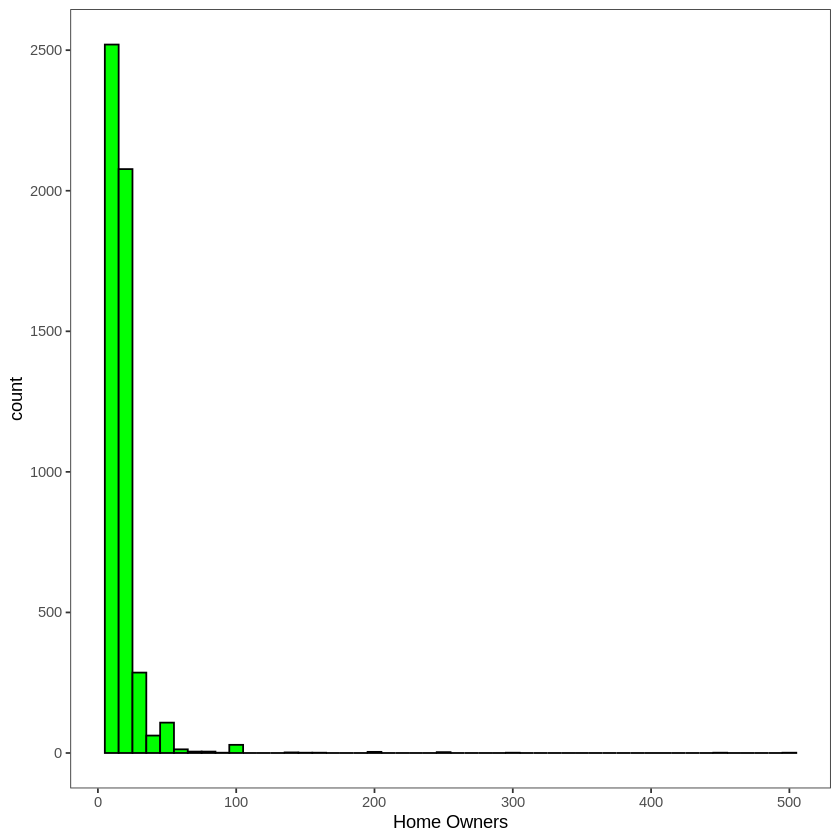

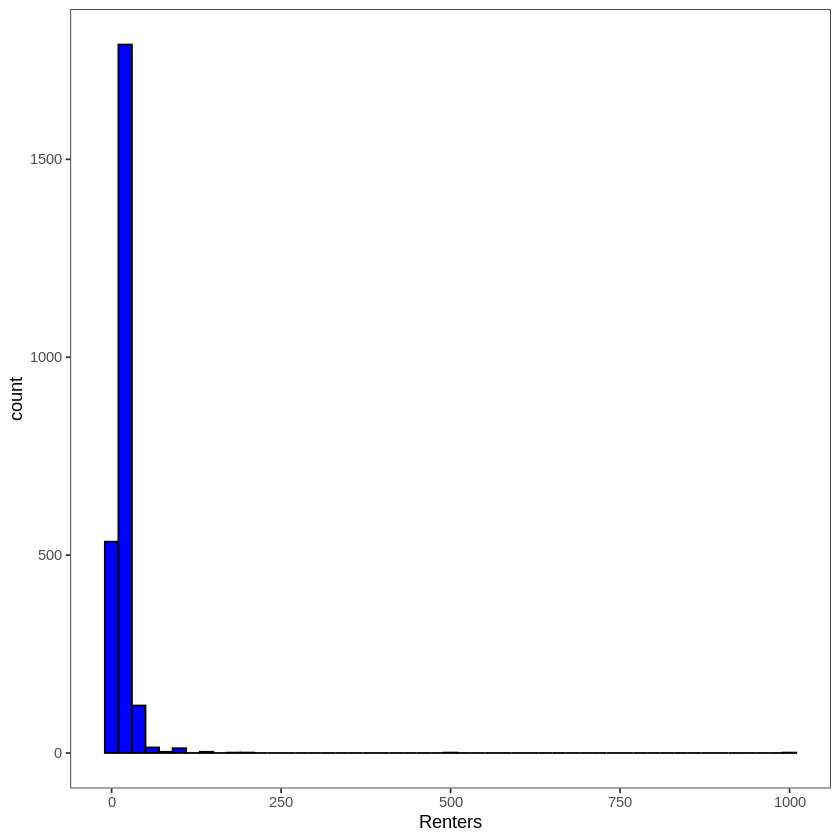

In [33]:
ggplot(Home)+geom_histogram(aes(x= Largest.Gift),color= 'black', fill= 'green', binwidth = 10)+ xlab('Home Owners')+ theme_bw()+theme(panel.grid= element_blank())
ggplot(Rent)+geom_histogram(aes(x= Largest.Gift), color= 'black',fill= 'blue',binwidth = 20)+ xlab('Renters')+theme_bw()+theme(panel.grid= element_blank())

#Checking for Assumption Violations

Two Assumptions: Homogeneity of variance and normality of population distribution

In [66]:
Rent1= Gift%>%filter(Group== 'Rent')
Home1= Gift%>%filter(Group== 'Own Home')

In [67]:
# Test for Normality
shapiro.test(Rent1$Largest.Gift)
shapiro.test(Home1$Largest.Gift)

# since the p values are showing significant results, there is a violation of the normal distribution assumption



	Shapiro-Wilk normality test

data:  Rent1$Largest.Gift
W = 0.21871, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Home1$Largest.Gift
W = 0.39166, p-value < 2.2e-16


In [58]:
# Test for Homogeneity of Variance
leveneTest(yi~as.factor(xi))
# No violation of Homogeneity of Variance.

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.410559,0.5217155
,4958,NA,NA


# Data Transformation

To fix the issue of the normality violation, transform the data by taking its square root, log or inverse when it is positively skewed.

In [75]:
Gift= Gift%>%mutate(Largest.Root= sqrt(Gift$Largest.Gift))

In [78]:
Gift= Gift%>%mutate(Largest.log= log10(Gift$Largest.Gift))

In [80]:
Gift= Gift%>%mutate(Largest.inv= 1/(-1)*(Gift$Largest.Gift))

In [81]:
# lets try Shapiro again
shapiro.test(Gift$Largest.Root)
shapiro.test(Gift$Largest.log)
shapiro.test(Gift$Largest.inv)


	Shapiro-Wilk normality test

data:  Gift$Largest.Root
W = 0.71471, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Gift$Largest.log
W = 0.93618, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Gift$Largest.inv
W = 0.27721, p-value < 2.2e-16


In [ ]:
# Is our data transformed?
ggplot(Gift)+geom_histogram(aes(x= Largest.Root),color= 'black',fill= 'blue', binwidth = 5)+theme_bw()+theme(panel.grid= element_blank())
ggplot(Gift)+geom_histogram(aes(x= Largest.log),color= 'black',fill= 'blue', binwidth = 5)+theme_bw()+theme(panel.grid= element_blank())
ggplot(Gift)+geom_histogram(aes(x= Largest.inv),color= 'black',fill= 'blue', binwidth = 5)+theme_bw()+theme(panel.grid= element_blank())

# Looking at the graphs below, the square root seemed to have worked best for our data.

# Hypothesis Testing

In [34]:
# Computing total number of participants
N= nrow(Gift)
N

[1] 4960

In [43]:
# Degrees of Freedom
Df= N-2
Df

[1] 4958

In [2]:
# Computing cutoff value
qt(p= .05, df= Df, lower.tail = FALSE)

[1] 1.645161

In [22]:
B= (1*m1+(-1*m2)/(1**2)+(-1**2))
B

[1] 0.6734315

In [24]:
A= mean(c(m1,m2))
A

[1] 19.74631

In [29]:
SSResid= sum((Home$Largest.Gift-m1)**2, (Rent$Largest.Gift-m2)**2)
SSResid

[1] 2312370

In [36]:
Sy.x= sqrt(SSResid/Df)
Sy.x

[1] 21.5961

In [38]:
SEb= Sy.x/sqrt(sum(xi-mean(xi))**2)
SEb

[1] Inf

In [40]:
# Computing t-value
tvalue= B/SEb
tvalue
# 0 < 1.65. Our calculated t-value is less than our cutoff so we fail to reject null hypothesis

[1] 0

In [41]:
# Computing p-value
pt(tvalue,Df, lower.tail = FALSE)
# Our Results are not significant.

[1] 0.5

# Effect Size


In [45]:
sPooled= sqrt(1/2*var(Home$Largest.Gift)+ var(Rent$Largest.Gift))
sPooled

[1] 28.02925

In [47]:
# Effect size based on Cohen's d
Cohensd= ((m1-m2)/sPooled)
Cohensd
# Very Small Effect size.

[1] 0.05970305